In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit  # Sigmoid function
from scipy.sparse import csr_matrix

In [112]:
# Load the data from the CSV file
df = pd.read_csv("C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals-2016_(T01)_TimeSequence.csv")



In [113]:
# Keep only relevant columns
selected_columns = ['Gen_RPM_Avg', 'Gen_Bear_Temp_Avg', 'Hyd_Oil_Temp_Avg', 'Amb_WindSpeed_Avg', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Gear_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg' ,'Nac_Direction_Avg', 'Rtr_RPM_Avg']  # Change based on relevance
df = df[selected_columns]

In [114]:
# Convert numerical columns to float32
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')


In [115]:
df_sample = df.iloc[21854:34920, :]  # Selects rows 1000 to 5000, all columns


In [116]:
# Convert to sparse matrix to reduce memory usage
X_sample = csr_matrix(df_sample[['Gen_RPM_Avg','Rtr_RPM_Avg']].values)
Y_sample = df_sample['Prod_LatestAvg_TotActPwr'].values

In [117]:
# Train Logistic Regression with memory-efficient settings
model = LogisticRegression(solver='saga', max_iter=100, penalty='l2')
model.fit(X_sample, Y_sample)

C:\Users\zihad\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [118]:
# Generate prediction curve
X_range1 = np.linspace(df_sample["Gen_RPM_Avg"].min(), df_sample["Gen_RPM_Avg"].max(), 300).reshape(-1, 1)
X_range2 = np.linspace(df_sample["Rtr_RPM_Avg"].min(), df_sample["Rtr_RPM_Avg"].max(), 300).reshape(-1, 1)

# Reshape to match model input shape
X_range = np.column_stack((X_range1, X_range2))  # Combine both features
Y_prob = model.predict_proba(X_range)[:, 1]  # Probability of failure

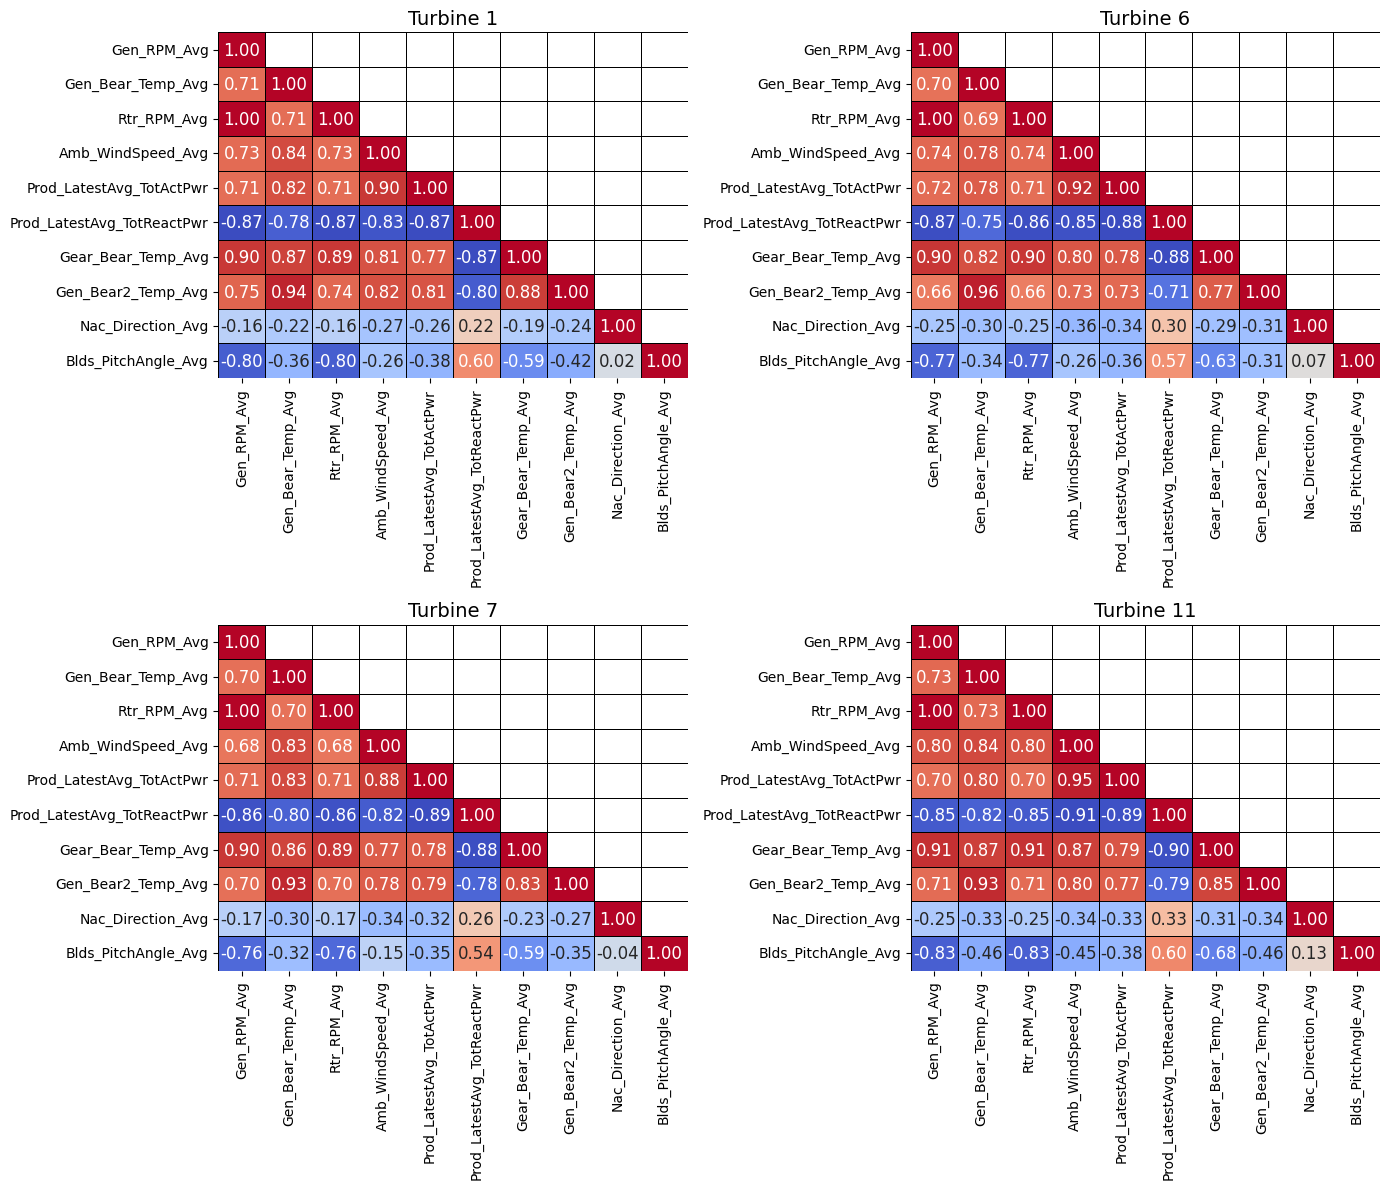

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the CSV file paths
turbine_files = ["C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T01)_TimeSequence.csv", "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T06)_TimeSequence.csv", "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T07)_TimeSequence.csv", "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T11)_TimeSequence.csv"]  # Replace with actual file paths
turbine_labels = ["Turbine 1", "Turbine 6", "Turbine 7", "Turbine 11"]

# Define the columns you want to include in the correlation matrix
selected_columns = ['Gen_RPM_Avg', 'Gen_Bear_Temp_Avg', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Gear_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg' ,'Nac_Direction_Avg', 'Blds_PitchAngle_Avg']  # Modify as needed

# Set up the figure with increased size
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Bigger figure for better visibility

for i, (file, label) in enumerate(zip(turbine_files, turbine_labels)):
    # Load data
    df = pd.read_csv(file)
    
    # Keep only selected columns (ensure they exist in the dataset)
    df_selected = df[[col for col in selected_columns if col in df.columns]].select_dtypes(include=['number'])

    # Compute correlation matrix
    corr = df_selected.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # This masks the upper triangle

    # Select subplot
    ax = axes[i // 2, i % 2]  # Position in 2x2 grid

    # Plot heatmap with the mask applied
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", ax=ax, annot_kws={"size": 12}, 
                linewidths=0.5, linecolor="black", cbar=False)

    ax.set_title(label, fontsize=14)  # Increase title font size

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

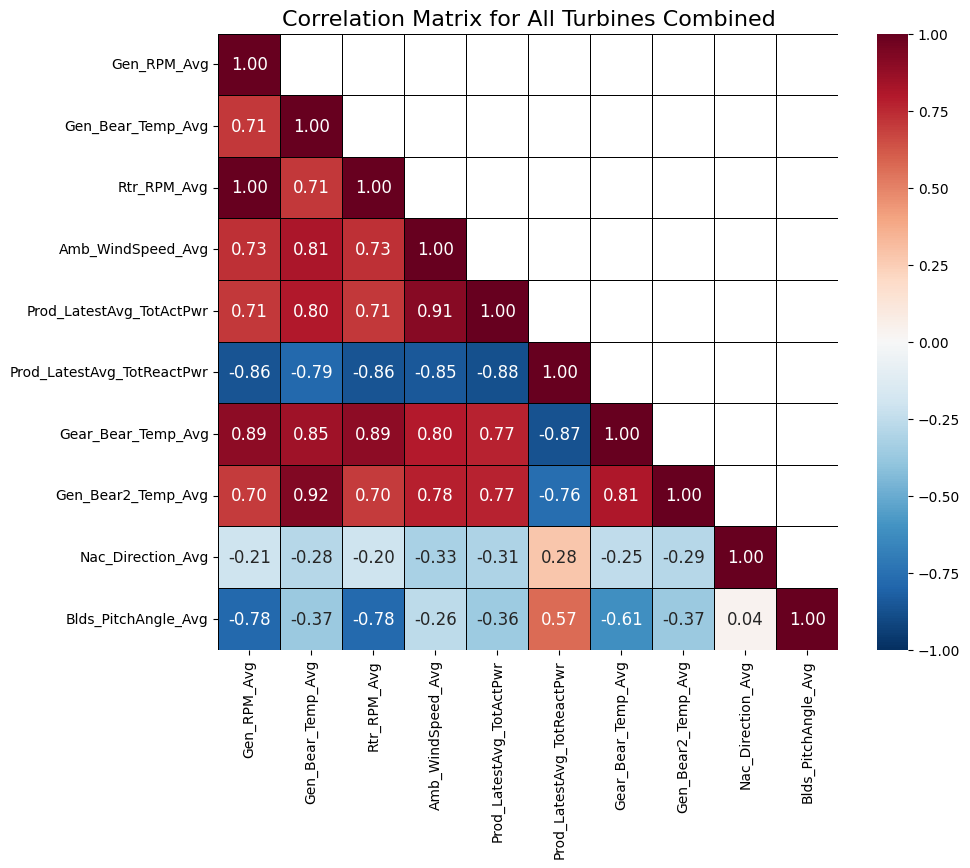

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the CSV file paths
turbine_files = ["C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T01)_TimeSequence.csv", "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T06)_TimeSequence.csv", "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T07)_TimeSequence.csv", "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T11)_TimeSequence.csv"]  # Replace with actual file paths
turbine_labels = ["Turbine 1", "Turbine 6", "Turbine 7", "Turbine 11"]

# Define the columns you want to include in the correlation matrix
selected_columns = ['Gen_RPM_Avg', 'Gen_Bear_Temp_Avg', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Gear_Bear_Temp_Avg', 'Gen_Bear2_Temp_Avg' ,'Nac_Direction_Avg', 'Blds_PitchAngle_Avg']  # Modify as needed

# Load and merge data from all turbines
all_data = []
for file, label in zip(turbine_files, turbine_labels):
    df = pd.read_csv(file)
    df_selected = df[[col for col in selected_columns if col in df.columns]].select_dtypes(include=['number'])
    
    # Add a column to indicate the turbine source (optional for later analysis)
    df_selected["Turbine"] = label
    
    all_data.append(df_selected)

# Combine all turbine data into a single DataFrame
merged_df = pd.concat(all_data, axis=0, ignore_index=True)

# Compute correlation matrix for all combined turbine data
corr = merged_df.drop(columns=["Turbine"]).corr()  # Drop turbine identifier before computing correlation

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # Keep diagonal visible

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot heatmap with controlled color scaling
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r", 
            linewidths=0.5, linecolor="black", annot_kws={"size": 12}, 
            vmin=-1, vmax=1, center=0)  # Ensures red at 1.00 and blue at -1.00

# Set title
plt.title("Correlation Matrix for All Turbines Combined", fontsize=16)

# Show plot
plt.show()

Columns in First CSV: ['Turbine_ID', 'Timestamp', 'Gen_RPM_Avg', 'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg', 'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1', 'Prod_LatestAvg_TotReactPwr', 'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg', 'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg', 'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', 'Blds_PitchAngle_Avg', 'Blds_PitchAngle_Std', 'Cont_VCP_ChokcoilTemp_Avg', 'Cont_VCP_WtrTemp_Avg', 'Rtr_RPM_Std', 'Amb_WindSpeed_Est_Avg', 'Gen_Bear2_Temp_Avg', 'Nac_Direction_Avg']
Columns in Second CSV: ['Turbine_ID', 'Timestamp', 'Gen_RPM_Avg', 'Gen_RPM_Std', 

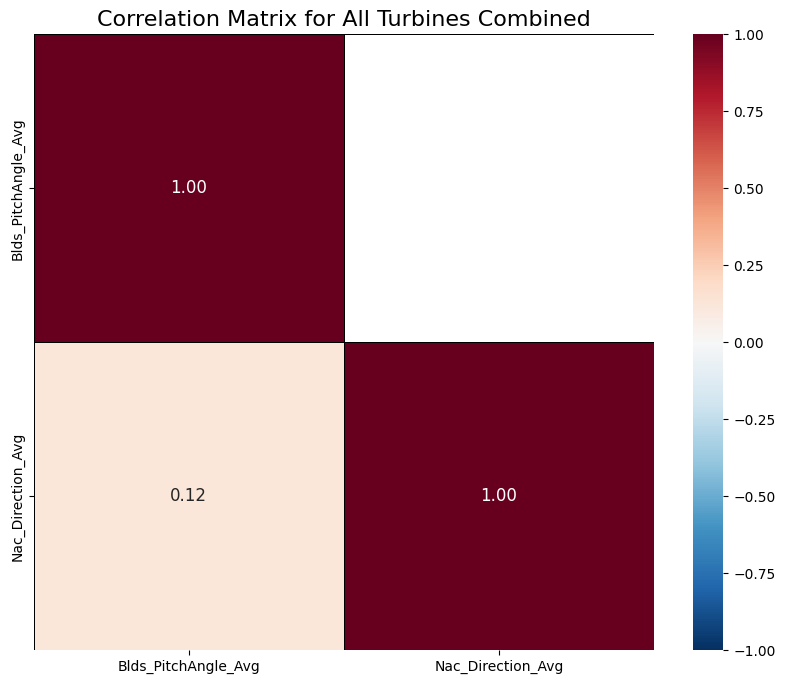

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Define paths to the two CSV files
file1 = "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T11)_TimeSequence.csv"  # Update with your actual file path
file2 = "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T07)_TimeSequence.csv"  # Update with your actual file path

# Load both CSVs into pandas DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Print available columns in each file for reference
print("Columns in First CSV:", df1.columns.tolist())
print("Columns in Second CSV:", df2.columns.tolist())

# Manually select the columns you want to compare (ensure they are numerical)
columns_file1 = ['Blds_PitchAngle_Avg']  # From first CSV
columns_file2 = ['Nac_Direction_Avg']  # From second CSV
# Extract only the selected columns
df1_selected = df1[columns_file1]
df2_selected = df2[columns_file2]

# Merge DataFrames by Index (assuming both files have the same number of rows)
merged_df = pd.concat([df1_selected, df2_selected], axis=1)

# Drop rows with NaN values (if any)
merged_df = merged_df.dropna()

# Compute correlation matrix
corr_matrix = merged_df.corr()

# Display correlation matrix in terminal
print("\nCorrelation Matrix:\n", corr_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # Keep diagonal visible

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot heatmap with controlled color scaling
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r", 
            linewidths=0.5, linecolor="black", annot_kws={"size": 12}, 
            vmin=-1, vmax=1, center=0)  # Ensures red at 1.00 and blue at -1.00

# Set title
plt.title("Correlation Matrix for All Turbines Combined", fontsize=16)

# Show plot
plt.show()